In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("global/homes/a/arosado/perlmutter_legacysim_runs/dndz_fitting/")
from dndz_fit import ELG_dndz

In [3]:
from astropy.table import Table
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [4]:
#base_dir = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/himalayas/LSScats/test/"
#data_fn = os.path.join(base_dir, 'ELG_full.dat.fits')
plot_dir = 'plots/'

In [5]:
%%time 
run = 'north'
data_fn = f"/pscratch/sd/a/arosado/legacysim_masked_ELG_data/data_{run}.fits"
depth_type_fit = 'GALDEPTH_G' # depth used for fitting model to legacysim data
bins = 50
test = ELG_dndz(data_fn, run=run, bins=bins, depth_type=depth_type_fit)

min(dndz - 1): -2.902729665168881, max(dndz - 1): 55.3369647750238
min(dndz - 1): -3.0409105441925393, max(dndz - 1): 36.42770733261781
CPU times: user 14.4 s, sys: 851 ms, total: 15.3 s
Wall time: 15.3 s


[ -3.07157461   3.78804937   0.81927807 -49.34656429  -0.56700121
   2.76631433 -48.96187612]


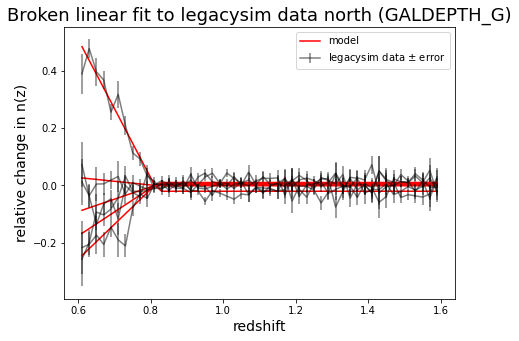

In [6]:
fig = plt.gcf()
fig.set_size_inches(7, 5)

params = test.params
print(params)
dndz = test.dndz_model((test.z_h, test.depth_h),*params)
plt.ylabel('relative change in n(z)', fontsize=14)
plt.xlabel('redshift', fontsize=14)

bins=test.bins-1
kw= dict(color='k', alpha=0.5)
plt.plot([],[], label=f'model',color='r')
plt.errorbar([],[],yerr=[], label=f'legacysim data $\pm$ error',**kw)
for ite in range(10):
    i, j = (bins)*ite, (bins)*(ite+1)
    plt.plot(test.z_h[i:j], dndz[i:j], color='r')
    plt.errorbar(test.z_h[i:j], test.dndz_h[i:j], yerr=test.yerr[i:j], **kw)
plt.legend()#fontsize=16)
plt.title(f'Broken linear fit to legacysim data {run} ({depth_type_fit})', fontsize=18)
#plt.savefig(f'{plot_dir}/fit_legacysim_data_{run}_{depth_type_fit}.png', bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

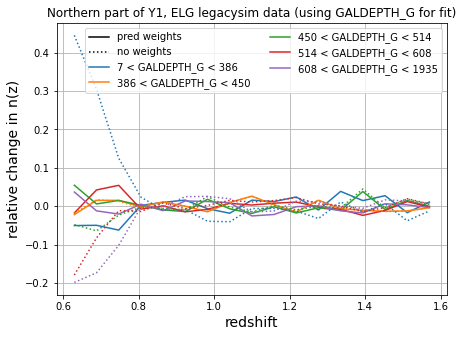

In [7]:
depth_type = depth_type_fit #'GALDEPTH_G'

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax.set_title('{}ern part of Y1, {}'.format(run.capitalize(),'ELG')+f' legacysim data (using {depth_type_fit} for fit)')#, fontsize=18)

ax.plot([], [], linestyle='-', color='k', label='pred weights')
ax.plot([], [], linestyle=':', color='k', label='no weights')

test.plot_dndz(test.z, test.legacysim[depth_type], depth_type=depth_type, weights=test.sim_weights, ls='-', legend=True)
plt.ylabel('relative change in n(z)', fontsize=14)
plt.xlabel('redshift', fontsize=14)
#plt.ylim(-0.5,0.9)
test.plot_dndz(test.z, test.legacysim[depth_type], depth_type=depth_type, weights=None, ls=':')
ax.grid(True)
#plt.savefig(f'{plot_dir}/legacysim_data_{run}_{depth_type_fit}.png', bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

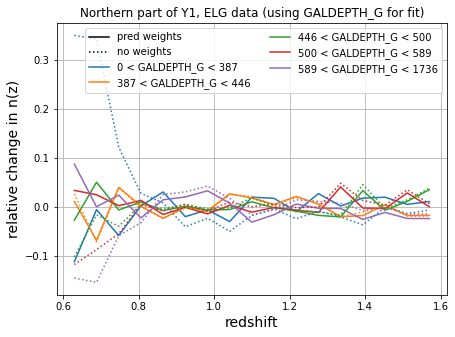

In [8]:
depth_type = depth_type_fit #'GALDEPTH_G'

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax.set_title('{}ern part of Y1, {}'.format(run.capitalize(),'ELG')+f' data (using {depth_type_fit} for fit)')#, fontsize=18)

ax.plot([], [], linestyle='-', color='k', label='pred weights')
ax.plot([], [], linestyle=':', color='k', label='no weights')

test.plot_dndz(test.z_cat, test.cat[depth_type], depth_type=depth_type, weights=test.new_weights*test.weights_cat, ls='-', legend=True)#, yerr=True)
plt.ylabel('relative change in n(z)', fontsize=14)
plt.xlabel('redshift', fontsize=14)
#plt.ylim(-0.5,0.9)
test.plot_dndz(test.z_cat, test.cat[depth_type],  depth_type=depth_type, weights=test.weights_cat, ls=':')
ax.grid(True)
#plt.savefig(f'{plot_dir}/ELG_data_{run}_{depth_type}_bin{bins}.png', bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

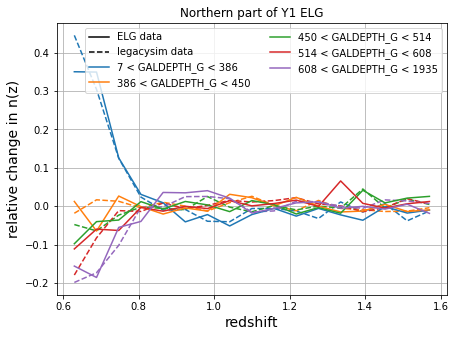

In [9]:
depth_type = depth_type_fit #'GALDEPTH_G'
quantiles = np.quantile(test.legacysim[depth_type], q=np.linspace(0., 1., 6)) # used because data have different depth range fro legacysim data?

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax.set_title(f'{run.capitalize()}ern part of Y1 ELG')#, fontsize=18)

ax.plot([], [], linestyle='-', color='k', label='ELG data')
ax.plot([], [], linestyle='--', color='k', label='legacysim data')

test.plot_dndz(test.z, test.legacysim[depth_type], depth_type=depth_type, quantiles=quantiles, weights=None, ls='--')
plt.ylabel('relative change in n(z)', fontsize=14)
plt.xlabel('redshift', fontsize=14)
#plt.ylim(-0.5,0.9)
test.plot_dndz(test.z_cat, test.cat[depth_type],  depth_type=depth_type, quantiles=quantiles, weights=test.weights_cat, ls='-',legend=True)
ax.grid(True)
#plt.savefig(f'{plot_dir}/dndz_ELG_{run}_{depth_type}.png', bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

# Checks

In [10]:
wmin, wmax = 0.0, 2.0 # min and max weight
print(f'total: {test.new_weights.size}')
print(f'weights less than {wmin}: {test.new_weights[test.new_weights < wmin].size}')
print(f'{test.new_weights[test.new_weights < wmin].size/test.new_weights.size*100:.3f}%')
print(f'weights greater than {wmax}: {test.new_weights[test.new_weights > wmax].size}')
print(f'{test.new_weights[test.new_weights > wmax].size/test.new_weights.size*100:.3f}%')

total: 451147
weights less than 0.0: 63
0.014%
weights greater than 2.0: 5042
1.118%


In [11]:
dmin, dmax = -1.0, 1.0 # min and max [dndz - 1]
print(f'total: {test.dndz_vals.size}')
print(f'[dndz - 1] less than {dmin}: {test.dndz_vals[test.dndz_vals < dmin].size}')
print(f'{test.dndz_vals[test.dndz_vals < dmin].size/test.dndz_vals.size*100:.3f}%')
print(f'[dndz - 1] greater than {dmax}: {test.dndz_vals[test.dndz_vals > dmax].size}')
print(f'{test.dndz_vals[test.dndz_vals > dmax].size/test.dndz_vals.size*100:.3f}%')

total: 451147
[dndz - 1] less than -1.0: 63
0.014%
[dndz - 1] greater than 1.0: 4270
0.946%


[ -3.07157461   3.78804937   0.81927807 -49.34656429  -0.56700121
   2.76631433 -48.96187612]
[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2
 3.3 3.4]


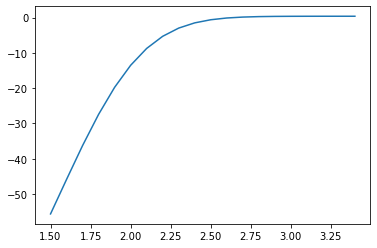

In [12]:
# function used to model depth dependence portion
a,b,c,d,e,f,g = test.params
print(test.params)
depth = np.arange(1.5,3.5,0.1)
print(depth)
fun = (d*sp.erf(depth/e+f) + g) 
plt.plot(depth, fun)
plt.show()

/tmp/ipykernel_44505/3884850267.py:3: RuntimeWarning: divide by zero encountered in log10
  sc = plt.scatter(test.z_cat,np.log10(test.depth_cat),c=test.new_weights.clip(0.0,2.0), s=1)


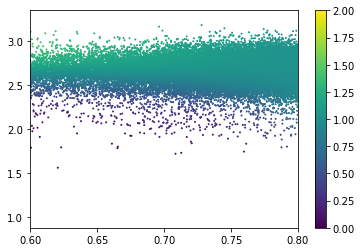

In [13]:
# Here we see how weights increase with increasing depth
#fig = plt.figure(figsize=(10,8))
sc = plt.scatter(test.z_cat,np.log10(test.depth_cat),c=test.new_weights.clip(0.0,2.0), s=1)
plt.xlim(0.6,0.8)
plt.colorbar(sc)
plt.show()